# The Sparks Foundation - Machine Learning/ Data Science Tasks
***
- Created by Aparajita Das
***
#### Q2. (To Explore Unsupervised Machine Learning)

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Task 1 : Importing Libraries and Loading Dataset
***

In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import yellowbrick as yb
plt.style.use('ggplot')

In [2]:
t2 = pd.read_csv("Iris.csv")

In [3]:
t2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


***
### Task 2 : Exploratory Data Analysis
***

In [4]:
t2.shape

(150, 6)

In [5]:
t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
t2.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


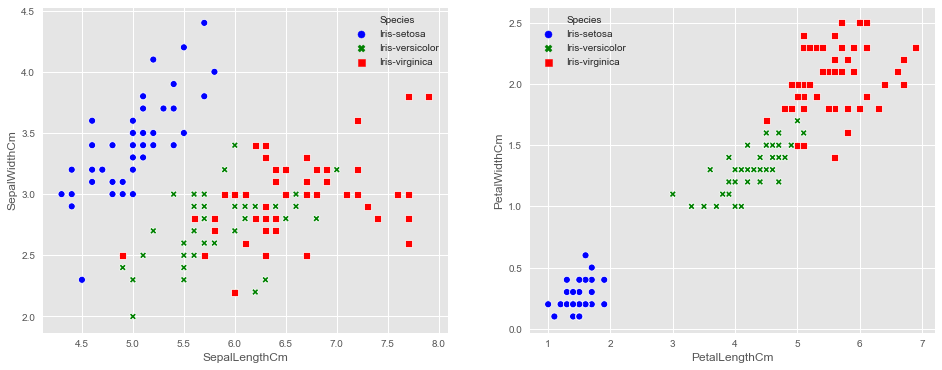

In [7]:
fig, ax = plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x = t2.SepalLengthCm, y =  t2.SepalWidthCm,
                hue = t2.Species, style = t2.Species, palette=['blue', 'green', 'red']);

plt.subplot(1,2,2)
sns.scatterplot(x = t2.PetalLengthCm, y =  t2.PetalWidthCm,
                hue = t2.Species, style = t2.Species, palette=['blue', 'green', 'red']);

***
### Task 3 : Using the dendogram to find the actual number of clusters
***

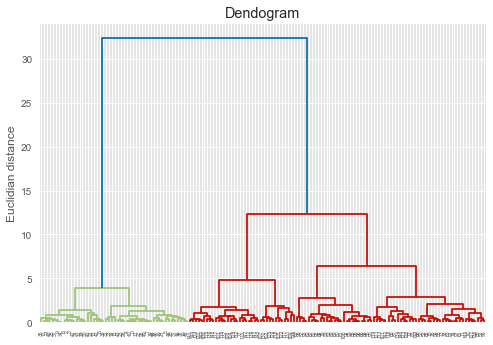

In [8]:
X = t2.iloc[:, [1, 2, 3,4]].values

import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method = 'ward')) #ward- minimising the variants of each of the clusters
plt.title('Dendogram')
plt.ylabel('Euclidian distance')
plt.show()

#### In Dendograms, to find the number of clusters, we see the Longest Vertical distance between two horizonatal lines. Clearly here it indicates the number of CLusters should be 2, which is not true, therefore Dendograms is not a good way of finding Clusters here. So we will further move with some other Technique

***
### Task 4 : Fitting the Elbow Method to find the actual number of clusters
***

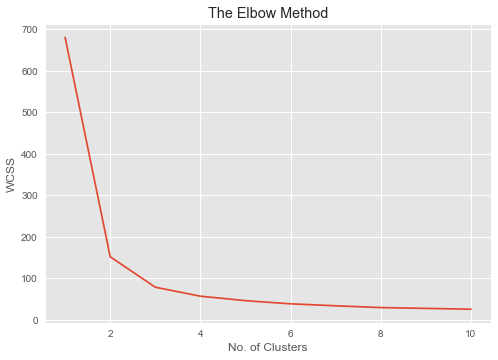

In [9]:
from  sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

#### In the Elbow method the number of Cluster prediction is true. So this Technique indiactes a number of Clusters=3

***
### Task 5 : Model Development with K-Means Clustering
***

In [10]:
# fitting k_means to teh dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

***
### Task 6 : Visualising the Clusters
***

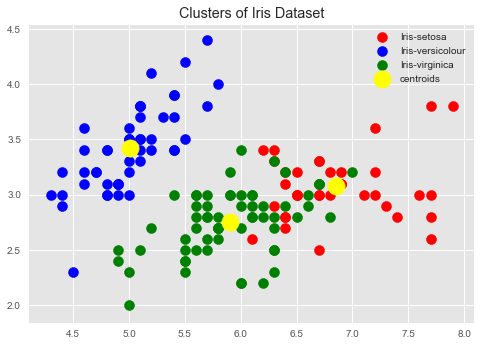

In [11]:
plt.scatter(X[y_kmeans == 0, 0],  X[y_kmeans == 0, 1], s= 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0],  X[y_kmeans == 1, 1], s= 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0],  X[y_kmeans == 2, 1], s= 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 300, c = 'yellow', label = 'centroids')
plt.title('Clusters of Iris Dataset')
plt.legend()
plt.show()

#### From the above visualization we see that one species can be easily clusterd which is not the case with the other two. Which may be the reason why the Dendograms predicted 2 Clusters.

#### Further K-Means with the Elbow method did an amazing job at predicting the number of true Clusters which is 3. The above visualization is the clustered graph.